# Training a classifier for hand-written digits

Data Source:
* https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Useful reading:
* https://stackoverflow.com/questions/42471523/how-can-i-generate-a-proper-mnist-image
* https://stackoverflow.com/questions/45539289/convert-image-from-28-28-4-to-2d-flat-array-and-write-to-csv
* https://stackoverflow.com/questions/61552402/if-image-has-28-28-3-shape-how-do-i-convert-it-to-28-28-1
* https://stackoverflow.com/questions/51205502/convert-a-black-and-white-image-to-array-of-numbers

In [9]:
! pip install xgboost

Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [1]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import fetch_openml
print('finished')

finished


In [2]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
    print('here')
else:
    print('there')

here


In [3]:
# import the mnist dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# separate features and target
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [18]:
from scipy.ndimage import shift

In [34]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [25]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=0.2, 
                                       random_state=42)

In [35]:
X_train_array = X_train.to_numpy(dtype=object)
X_train_array = np.array(X_train_array, np.int64)

In [37]:
X_train_array[0].shape

(784,)

In [38]:
X_train_augmented = [image for image in X_train_array]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train_array, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
print('finished')

finished


In [40]:
X_train_augmented.shape

(280000, 784)

In [42]:
y_train_augmented.shape

(280000,)

In [45]:
X_train_sereis = pd.DataFrame(X_train_augmented)
X_train_sereis

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,255,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,26,0,13,64,138,180,199,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,224,232,207,221,253,242,162,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195,253,210,160,161,111,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,236,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,247,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,244,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,224,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,247,50,0,38,70,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,234,114,198,243,253,245,206,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230,253,253,247,179,137,213,254,211,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,146,160,160,50,0,0,25,152,253,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [89]:
y_train_series = pd.Series(y_train_augmented)
y_train_sereis_float = y_train_series.astype(float)
type(y_train_sereis_float.iloc[0])

numpy.float64

In [62]:
type(y_test.iloc[0])

str

In [65]:
type(X_train.iloc[0]['pixel1'])

numpy.float64

In [67]:
type(X_train_sereis.iloc[0][0])

numpy.int64

In [70]:
X_train_sereis = X_train_sereis.astype(float)
type(X_train_sereis.iloc[0][0])

numpy.float64

## Exploratory Analysis

In [12]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pix

In [6]:
type(X.iloc[0])

pandas.core.series.Series

In [7]:
X.iloc[0].shape

(784,)

In [8]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [9]:
# explore one digit
some_digit=np.array( X.iloc[0])
print(len(some_digit))
some_digit[400:500]

784


array([  0.,   0.,   0.,   0.,   0.,  81., 240., 253., 253., 119.,  25.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  45., 186., 253., 253., 150.,  27.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.,  93., 252.,
       253., 187.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 249., 253., 249.,  64.,   0.,   0.,
         0.])

In [10]:
# explore one digit
some_digit_image = some_digit.reshape(28, 28)
print(len(some_digit_image))
print(len(some_digit_image[0]))
some_digit_df=pd.DataFrame(some_digit_image)

28
28


In [11]:
# show the output
pd.set_option('display.max_columns', None)
some_digit_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,0.0,43.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# examine its label
print(y[0])
print(type(y[0]))
y_int=y.astype(np.uint8)
print(y_int[0])

5
<class 'str'>
5


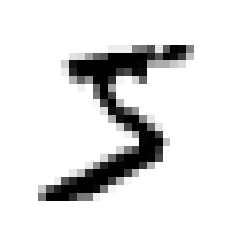

In [13]:
# display the figure
import matplotlib as mpl 
import matplotlib.pyplot as plt
f = plt.figure()
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest") 
plt.axis("off")
plt.show()

## Preprocessing

In [82]:
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sereis)
#X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('finished')

finished


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [57]:
# pickle the scaler

f = open('scaler.pkl', 'wb')
pickle.dump(scaler, f)
f.close()  
print('finished')

finished


In [81]:
type(X_train_scaled[0][0])

numpy.float64

## Single Decision Tree

In [84]:
# instantiate with arbitrary hyperparameters

tree_model = DecisionTreeClassifier(
                               max_depth=7, 
                               criterion='entropy', 
                               min_samples_leaf=10,
                               class_weight='balanced')

In [85]:
# train the model
tree_model.fit(X_train_scaled, y_train_series)
print('finished')

finished


In [86]:
# predict
y_preds=tree_model.predict(X_test_scaled)
print(list(y_preds[:10]))
print(list(y_test[:10]))

['8', '9', '2', '7', '7', '0', '2', '2', '7', '4']
['8', '4', '8', '7', '7', '0', '6', '2', '7', '4']


In [87]:
# evaluate
print('Accuracy:', metrics.accuracy_score(y_test, y_preds))
print('Precision:', metrics.precision_score(y_test, y_preds,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_preds,average='macro'))
print('F1 Score:', metrics.f1_score(y_test, y_preds,average='macro'))

Accuracy: 0.7836428571428572
Precision: 0.7840878223888279
Recall: 0.7806643764629375
F1 Score: 0.7804132829609489


## Random Forest

In [22]:
# modeling: random forest (arbitrary hyperparameters)

rf_model = RandomForestClassifier(max_depth=8, 
                                  min_samples_leaf=10, 
                                  n_estimators=100,
                                  max_features='sqrt', # max_features=sqrt(n_features)
                                  criterion='gini'
                                 )


In [24]:
# train the model (this is very time-consuming!!) uncomment next line
# rf_model.fit(X_train_scaled, y_train)

# as a workaround, we unpickle the trained model from the previous run
filename = open('../model_outputs/rf_model.pkl', 'rb')
rf_model = pickle.load(filename)
filename.close()

In [25]:
# predict
y_preds=rf_model.predict(X_test_scaled)
print(list(y_preds[:10]))
print(list(y_test[:10]))

['8', '4', '6', '7', '7', '0', '6', '2', '7', '9']
['8', '4', '8', '7', '7', '0', '6', '2', '7', '4']


In [26]:
# evaluate
print('Accuracy:', metrics.accuracy_score(y_test, y_preds))
print('Precision:', metrics.precision_score(y_test, y_preds,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_preds,average='macro'))
print('F1 Score:', metrics.f1_score(y_test, y_preds,average='macro'))

Accuracy: 0.923
Precision: 0.9237990310519327
Recall: 0.9219848045361392
F1 Score: 0.9225885939881333


## XG Boost

There are in general two ways that you can control overfitting in XGBoost:

- The first way is to directly control model complexity.

    - This includes max_depth, min_child_weight and gamma.

- The second way is to add randomness to make training robust to noise.

    - This includes subsample and colsample_bytree.

    - You can also reduce stepsize eta. Remember to increase num_round when you do so.

[source](https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html#:~:text=There%20are%20in,you%20do%20so.)

In [72]:
# modeling: XGBoost (arbitrary hyperparameters)

xgb_model = XGBClassifier(max_depth=6, 
                          min_child_weight=1, 
                          gamma=0, 
                          subsample=1, 
                          learning_rate=0.3)

In [90]:
# train the model (this is very time-consuming!!) uncomment next line
#xgb_model.fit(X_train_scaled, y_train_series)
xgb_model.fit(X_train_scaled, y_train_sereis_float)
print('finished')

# as a workaround, we unpickle the trained model from the previous run
# filename = open('../model_outputs/xgb_model.pkl', 'rb')
# xgb_model = pickle.load(filename)
# filename.close()

finished


In [94]:
# predict
y_preds=xgb_model.predict(X_test_scaled)
print(list(y_preds[:10]))
print(list(y_test[:10]))

[8, 4, 8, 7, 7, 0, 6, 2, 7, 4]
['8', '4', '8', '7', '7', '0', '6', '2', '7', '4']


In [97]:
y_test_float = y_test.astype(int)
print(list(y_test_float[:10]))


[8, 4, 8, 7, 7, 0, 6, 2, 7, 4]


In [98]:
# evaluate
print('Accuracy:', metrics.accuracy_score(y_test_float, y_preds))
print('Precision:', metrics.precision_score(y_test_float, y_preds,average='macro'))
print('Recall:', metrics.recall_score(y_test_float, y_preds,average='macro'))
print('F1 Score:', metrics.f1_score(y_test_float, y_preds,average='macro'))

Accuracy: 0.9831428571428571
Precision: 0.9831088861675468
Recall: 0.9831418463518501
F1 Score: 0.9831156175663779


In [104]:
def model_metrics(y_test, predictions):
    '''
    Calculate 5 standard model metrics
    Return a dictionary with the metrics
    '''
    f1 = metrics.f1_score(y_test, predictions, average='macro')
    accuracy = metrics.accuracy_score(y_test, predictions)
    error = 1 - accuracy
    precision = metrics.f1_score(y_test, predictions,average='macro')
    recall = metrics.recall_score(y_test, predictions, average='macro')
    return {'precision': precision, 'recall': recall,'f1 score':f1, 'accuracy': accuracy, 'error rate': error}

eval_scores=model_metrics(y_test_float, y_preds)
eval_scores

{'precision': 0.9831156175663779,
 'recall': 0.9831418463518501,
 'f1 score': 0.9831156175663779,
 'accuracy': 0.9831428571428571,
 'error rate': 0.016857142857142904}

In [106]:
file = open('../model_outputs/eval_scores.pkl', 'wb')
pickle.dump(eval_scores, file)
file.close()

In [110]:
import plotly.graph_objs as go
Viridis=[
"#440154", "#440558", "#450a5c", "#450e60", "#451465", "#461969",
"#461d6d", "#462372", "#472775", "#472c7a", "#46307c", "#45337d",
"#433880", "#423c81", "#404184", "#3f4686", "#3d4a88", "#3c4f8a",
"#3b518b", "#39558b", "#37598c", "#365c8c", "#34608c", "#33638d",
"#31678d", "#2f6b8d", "#2d6e8e", "#2c718e", "#2b748e", "#29788e",
"#287c8e", "#277f8e", "#25848d", "#24878d", "#238b8d", "#218f8d",
"#21918d", "#22958b", "#23988a", "#239b89", "#249f87", "#25a186",
"#25a584", "#26a883", "#27ab82", "#29ae80", "#2eb17d", "#35b479",
"#3cb875", "#42bb72", "#49be6e", "#4ec16b", "#55c467", "#5cc863",
"#61c960", "#6bcc5a", "#72ce55", "#7cd04f", "#85d349", "#8dd544",
"#97d73e", "#9ed93a", "#a8db34", "#b0dd31", "#b8de30", "#c3df2e",
"#cbe02d", "#d6e22b", "#e1e329", "#eae428", "#f5e626", "#fde725"]

mydata = [go.Bar(
    x=list(eval_scores.keys()),
    y=list(eval_scores.values()),
    marker=dict(color=Viridis[::12])
)]

mylayout = go.Layout(
    title='Evaluation Metrics for Logistic Regression Model (Testing Dataset = 127 passengers)',
    xaxis = {'title': 'Metrics'},
    yaxis = {'title': 'Percent'}, 

)
fig = go.Figure(data=mydata, layout=mylayout)
fig

In [111]:
file = open('../model_outputs/score_fig.pkl', 'wb')
pickle.dump(fig, file)
file.close()

## Evaluate on new data

In [32]:
## read in our pickle file
filename = open('example-user-input.pkl', 'rb')
array_to_data_output = pickle.load(filename)
filename.close()

In [33]:
# what is the digit type
print(type(array_to_data_output))
print(array_to_data_output.shape)

<class 'pandas.core.frame.DataFrame'>
(28, 28)


In [34]:
# show the digit
pd.set_option('display.max_columns', None)
array_to_data_output

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,5,36,36,36,36,36,36,36,36,36,36,36,36,20,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,213,255,255,255,255,255,255,255,255,255,255,255,255,255,36,0,0,0,0,0,0,0
5,0,0,0,0,0,0,255,192,109,109,109,109,109,109,109,109,109,109,109,93,5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,255,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,255,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,255,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,255,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# convert the user input to the format expected by the model
some_digit_array = np.reshape(array_to_data_output.values, -1)
print(some_digit_array[:150])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   5  36  36  36  36  36  36  36  36  36  36  36  36  20   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 213 255 255 255 255 255 255 255
 255 255 255 255 255 255  36   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 192 109 109]


In [37]:
# Standardize
some_digit_scaled = scaler.transform([some_digit_array])
print(some_digit_scaled[0][:50])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00457315 -0.00595681 -0.00422581 -0.00422581  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00422581 -0.00644617 -0.00859209 -0.01091681
 -0.01355956 -0.01941039 -0.02448325 -0.02895702 -0.0301599  -0.03233274
 -0.0332658  -0.02905717 -0.02870756 -0.02701646 -0.02273783 -0.01762933
 -0.01644529 -0.01059506]


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# make a prediction: Random Forest
rf_pred = rf_model.predict(some_digit_scaled)
rf_prob_array = rf_model.predict_proba(some_digit_scaled)
print(rf_pred, rf_prob_array)

['3'] [[0.03028706 0.01199069 0.12673746 0.34969413 0.0219485  0.31963127
  0.08811872 0.01434146 0.02275428 0.01449643]]


In [39]:
rf_prob = max(rf_prob_array[0])
rf_prob=round(rf_prob*100,2)
print( f'Digit: {rf_pred[0]}', f'Probability: {rf_prob}%')

Digit: 3 Probability: 34.97%


In [40]:
# make a prediction: XG Boost
xgb_pred = tree_model.predict(some_digit_scaled)
xgb_prob_array = tree_model.predict_proba(some_digit_scaled)
print(xgb_pred, xgb_prob_array)

['5'] [[0.00438328 0.00582389 0.00868842 0.10460581 0.         0.80753181
  0.0533672  0.         0.01559959 0.        ]]


In [41]:
xgb_prob = max(xgb_prob_array[0])
xgb_prob=round(xgb_prob*100,2)
print(f'Digit: {xgb_pred[0]}', f'Probability: {xgb_prob}%')

Digit: 5 Probability: 80.75%


## Pickle the trained models

In [ ]:
# random forest
f = open('../model_outputs/rf_model.pkl', 'wb')
pickle.dump(rf_model, f)
f.close()  

In [91]:
# XG Boost
f = open('../model_outputs/xgb_model_enhanced.pkl', 'wb')
pickle.dump(xgb_model, f)
f.close()  